### Simple program demonstrating low rank approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Loading lenna image

In [2]:
tak = Image.open('lena_gray.bmp')

In [3]:
def display_from_array(arr):
    after = Image.fromarray(arr)
    after = after.convert("RGB")
    display(after)

In [4]:
image = np.array(tak)
image = np.average(image, axis=2)
print(image.shape)

(512, 512)


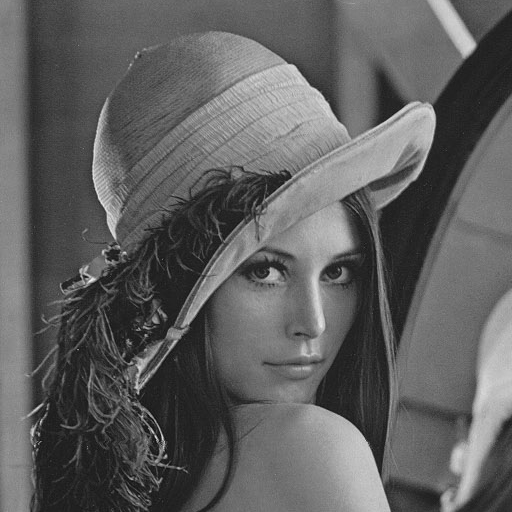

In [5]:
display_from_array(image)

After changing image to numpy array we can use singular value decomposition, in order to write it in summation form.

In [8]:
S, U, V = np.linalg.svd(image)
S = S.T

In [9]:
distance = []
approx = np.zeros((512, 512))
frames = []
for i in range(512):
    approx += U[i] * np.outer(S[i], V[i])
    step = Image.fromarray(approx)
    step = step.convert("RGB")
    if i < 100 or i % 10 == 0:
        frames.append(step)
    distance.append(np.linalg.norm(image - approx))

In [10]:
time = 144
duration = []
for _ in range(143):
    duration.append(time)
    time -= 1
duration.append(time)

Creating a gif

In [9]:
frame_one = frames[0]
frame_one.save("approximating_lenna.gif", format="GIF", append_images=frames,
                   save_all=True, duration=duration, loop=0)

The sum is rapidly converging to original image

<img src="approximating_lenna.gif" width="500" align="center">

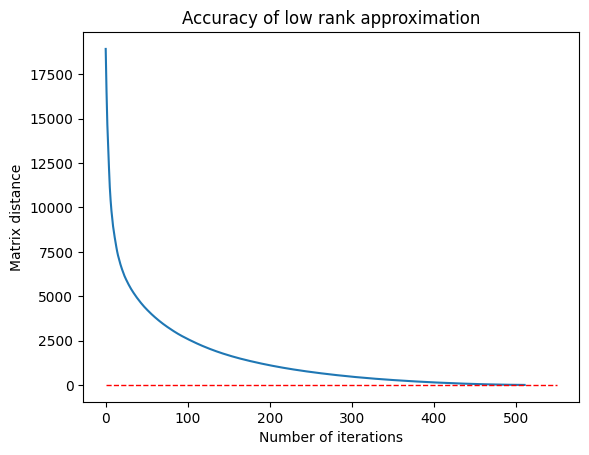

In [11]:
plt.plot([i for i in range(len(distance))], distance)
plt.title("Accuracy of low rank approximation")
plt.xlabel("Number of iterations")
plt.ylabel("Matrix distance")
plt.plot([0, 550], [0, 0], linestyle="--", linewidth=1, color='red')
plt.show()